#### 24.2

Sort and scan through array from left to right.  TC: $O(nlogn)$, SC: $O(1)$ (if using in place, iterative sorting).



In [15]:
from math import inf

def FindSmallestPos(A):
    
    A.sort()
    
    for i in range(len(A)):
        if A[i] > 0:
            break
            
            
    ### A[i] could either still be negative, or it could be some value>1
    if A[i] != 1:
        return 1
    
    ### if A[i] == 1 and i = len(A)-1, return 1
    if i == len(A) - 1:
        return 1
    
    ### otherwise, loop till end of A
    old_val = 1
    for j in range(i+1, len(A)):
        if A[j] == old_val:
            continue
        else:
            if A[j] == old_val + 1:
                old_val += 1
            else:
                return old_val + 1
    
    return old_val+1
    


A = [3, 5, -1, -1, 4, 5]
print(FindSmallestPos(A))

A = [3, 5, -1, -1,1, 4, 5]
print(FindSmallestPos(A))


A = [3, 2, 5, -1, -1,1, 4, 5]
print(FindSmallestPos(A))



1
2
6


I can also solve this problem by using a hash table to fill out which values I do have, then, iterate from 1 to n + 1, 
to find the missing value.

In [22]:
## TC: O(n), SC: O(n)

def FindSmallestPos2(A):
    A_hash = dict()
    
    for a in A:
        A_hash[a] = True
    
    for i in range(1, len(A)+1):
        if i in A_hash:
            continue
        else:
            return i
        
    return i+1

A = [3, 5, -1, -1, 4, 5]
print(FindSmallestPos2(A))

A = [3, 5, -1, -1,1, 4, 5]
print(FindSmallestPos2(A))


A = [3, 2, 5, -1, -1,1, 4, 5]
print(FindSmallestPos2(A))



1
2
6


#### 24.3
For clarification, I solve this problem assuming we can perform at most $k$ buy-sell trades (and not exactly $k$ buy-sell trades).  This problem can be solved using dynamic programming.  Consider if we allowed to preform $k$ more buy-sell trades on an array starting at $i$.  Say, we know in the optimal solution, that the next best sell occurs at $j$ (i<j\le |A|-1), then the maximum profit we can get is $MaxProfit(k-1, j+1) + (A[j]- min_{i \le l < j}$.  Notice that I now have a problem of the same exact kind, but with smaller arguments and therefore I can solve this recursively.  Of course, we do not know what $j$ is, so I just take a max over all possiblities.  The recurrence, with proper base cases is below:

\begin{equation}
  MaxProfit(k, i)=\begin{cases}
    0 & \text{for $k=0$}\\
    0 & \text{for $k>0, j = |A|$}\\
    max \left \{ max_{i<j\le|A|-1} \left\{ MaxProfit(k-1, j+1) + (A[j]- min_{i \le l < j} \{ A[l] \} \right\}, 0 \right\} & \text{otherwise}.
  \end{cases}
\end{equation}

The minimum in the equation can be found along the way while iterating over $j$, so the amount of extra work the finding this minimum takes is just $O(1)$ (see code below if this is confusing).  Note that I had to also put an additional max around the recursive part of the formula, since it might not be possible to generate a positive return.  Therefore, the total time complexity is $O(kn^2)$, and the space complexity is $O(kn)$ for the memo table.  Also note that the space complexity can easily be brought down to $O(n)$ by implementing this bottom up, since, if the memo table is a $k \times |A|$ matrix, we only need to know the values of the row above the current problem we are considering.  Therefore, once a row is fully filled out, we just use this row as the new memo table.

In [87]:
def MaxProfit(A, k):

    def MaxProfitDP(k, i, memo):

        if k == 0:
            return 0

        if k > 0 and i == len(A):
            return 0

        curr_min = A[i]
        curr_max = -inf
        for j in range(i+1, len(A)):
            curr_max = max(curr_max, MaxProfitDP(k-1, j+1, memo) + A[j] - curr_min)
            curr_min = min(curr_min, A[j])

        memo[(k,i)] = max(0, curr_max)
        return memo[(k,i)]
    
    return MaxProfitDP(k, 0, {})


A = [10, 22, 5, 75, 65, 80] ## correct answer 87
print(MaxProfit(A, 2))

A = [12, 14, 17, 10, 14, 13, 12, 15] ## correct answer 12
print(MaxProfit(A, 3))

A = [100, 30, 15, 10, 8, 25, 80] ## correct answer 72
print(MaxProfit(A, 3))

A = [90, 80, 70, 60, 50] ## correct answer 0
print(MaxProfit(A, 1))

87
12
72
0


#### 24.4 

This can be solved using reason and some case analysis.  To solve this, I make 1 linear pass to get the number of zero, the number of negatives, the smallest positive number, the most negative number and the least negative number. Then there are 3 cases to consider:

1) $n_0 >1$: return 0

2) $n_0 =1$: return max(0, $\Pi_i A_i$) (where the product does not include 0)

3)$n_0 =0$
    
    3a) $n_{-} = 0$: take away smallest + number
    3b) $n_{-}$ is even: take away smallest + number if a positive number exists.  If a + number does not exist, then take away most negative number.
    3c) $n_{-}$ is odd: take away least negative number

In [25]:
## TC: O(n), SC: O(1)

from math import inf

def MaxProduct(A):
    
    num_neg = 0
    num_0 = 0
    smallest_pos = (inf, None)
    most_neg = (0, None)
    least_neg = (-inf, None)
    
    for i in range(len(A)):
        if A[i] == 0:
            num_0 += 1
        elif A[i] > 0:
            if A[i] < smallest_pos[0]:
                smallest_pos = (A[i], i)
        else:
            num_neg += 1
            if A[i] < most_neg[0]:
                most_neg = (A[i], i)
            if A[i] > least_neg[0]:
                least_neg = (A[i], i)
                
    if num_0>1:
        return 0
    
    elif num_0 == 1:
        prod=1
        for i in range(len(A)):
            if A[i] == 0:
                continue
            else:
                prod *= A[i]
        return max(0, prod)
    
    else:
        if num_neg % 2 == 0:
            if smallest_pos[1] != None:
                prod=1
                for i in range(len(A)):
                    if i == smallest_pos[1]:
                        continue
                    else:
                        prod *= A[i]
                return prod
            else:
                prod=1
                for i in range(len(A)):
                    if i == most_neg[1]:
                        continue
                    else:
                        prod *= A[i]
                return prod
            
        else:
            prod=1
            for i in range(len(A)):
                if i == least_neg[1]:
                    continue
                else:
                    prod *= A[i]
            return prod
        
        
A = [3, 2, -1, 4, -1, 6]
MaxProduct(A)
            
                

72

#### Variant of 24.4

This problem can be solved with 1 linear scan through $A$ from right to left, setting $B[i]$ to: $B[i] = \Pi_{j = i+1}^{n-1} A[j]$ (initialized with $B[n-1] = 1$).  With another scan from left to right through $A$, I can save in $A[i]$: $A[i] = \Pi_{j = 0}^{i-1} A[j]$ (initialized with $A[0] = 1$).  Finally, the answer is the element-wise product of these 2 arrays.  Notice that I use $A$ and $B$ judiciously to make the algo $O(1)$ in space complexity. 

In [35]:
def ComputeB_div(A):
    B = [None]*len(A)
    
    prod = 1
    for i in range(len(A)):
        prod*=A[i]
        
    for i in range(len(A)):
        B[i] = int(prod/A[i])
        
    return B

def ComputeB(A):
    
    prod = new_prod = 1
    i = len(A) - 1
    B = [None]*len(A)
    while i >= 0:
        new_prod *= A[i]
        B[i] = prod
        
        prod = new_prod 
        i -= 1
        
    prod = new_prod = 1
    for i in range(len(A)):
        new_prod *= A[i]
        A[i] = prod
        
        prod = new_prod 
        
    for i in range(len(A)):
        B[i] = B[i]*A[i]
    
    return B

A=[2, 3, 4, 5, 6]
print(ComputeB_div(A))
print(ComputeB(A))

[360, 240, 180, 144, 120]
[360, 240, 180, 144, 120]


#### Variant of 24.4

This problem can also be solved by carefully considering all possible cases regarding the number of zeros, number of negative values and number of positive values in the array.  As a simple example, if there is at least 3 positive number in the array, and at least 2 negative numbers in the array, the function should return $\max($most_pos_num$*$most_neg_num$*$2nd_most_neg_num, most_pos_num$*$2nd_most_pos_num$*$3rd_most_pos_num$)$.

In [66]:
from math import inf

def ComputeTripletBF(A):
    
    max_prod = -inf
    for i in range(len(A)-2):
        for j in range(i+1, len(A)-1):
            for k in range(j+1, len(A)):
                max_prod = max(A[i]*A[j]*A[k], max_prod)
                
    return max_prod

def ComputeTriplet(A):
    if len(A) == 3:
        return A[0]*A[1]*A[2]
    
    
    num_neg, num_pos, num_zero = 0, 0, 0
    
    leastneg1, leastneg2, leastneg3 = -inf, -inf, -inf
    most_neg1, most_neg2 = 0, 0
    most_pos1, most_pos2, most_pos3 = 0, 0, 0
    
    
    
    for i in range(len(A)):
        if A[i]<0:
            num_neg += 1
            if leastneg1 < A[i]:
                s = sorted([A[i], leastneg2, leastneg3])
                leastneg1 = s[0]
                leastneg2 = s[1]
                leastneg3 = s[2]
            if A[i] < most_neg2:
                s = sorted([A[i], most_neg1])
                most_neg1 = s[0]
                most_neg2 = s[1]        
        elif A[i]>0:
            num_pos += 1
            if A[i] > most_pos3:
                s = sorted([A[i], most_pos2, most_pos1])
                most_pos3=s[0]
                most_pos2=s[1]
                most_pos1=s[2]   
        else:
            num_zero += 1
            
            
    if num_neg + num_pos < 3:
        return 0
    
    else:
        if num_pos == 0:
            if num_zero > 0:
                return 0
            else:
                return leastneg1*leastneg2*leastneg3
        if num_pos == 1:
            return most_pos1*most_neg1*most_neg2
        if num_pos == 2:
            if most_neg2 != 0:
                return most_pos1*most_neg1*most_neg2
            else:
                return 0
        if num_pos >=3:
            if most_neg1 != 0 and most_neg2 != 0:
                return max(most_pos1*most_pos2*most_pos3, most_pos1*most_neg1*most_neg2)
            else:
                return most_pos1*most_pos2*most_pos3
            
    
import numpy as np

### test

for _ in range(1):
    rands = np.random.choice(range(-20, 20), size = 15, replace=True)
    if ComputeTripletBF(rands) != ComputeTriplet(list(rands)):
        print(ComputeTripletBF(rands), ComputeTriplet(list(rands)))
        print('Algo failed for input:', rands)
            
    
import numpy as np

### test algo to see if it matches the brute force solution
for _ in range(100):
    rands = np.random.choice(range(-20, 20), size = 15, replace=True)
    if ComputeTripletBF(rands) != ComputeTriplet(list(rands)):
        print(ComputeTripletBF(rands), ComputeTriplet(list(rands)))
        print('Algo failed for input:', rands)
print('passed all tests')
        
for _ in range(100):
    rands = np.random.choice(range(-20, 20), size = 5, replace=True)
    if ComputeTripletBF(rands) != ComputeTriplet(list(rands)):
        print(ComputeTripletBF(rands), ComputeTriplet(list(rands)))
        print('Algo failed for input:', rands)
print('passed all tests')
        
for _ in range(100):
    rands = np.random.choice(range(-4, 4), size = 4, replace=True)
    if ComputeTripletBF(rands) != ComputeTriplet(list(rands)):
        print(ComputeTripletBF(rands), ComputeTriplet(list(rands)))
        print('Algo failed for input:', rands)
print('passed all tests')

passed all tests
passed all tests
passed all tests


#### 24.5

The brute force way to solve this is to examine all $O(n^2)$ $i<j$ pairs and examine if each is increasing.  Overall this takes $O(n^3)$ time.

A better way to solve this is with DP.  I implement a top down and bottom up solution below.  In addition to the normal memo table, for each problem, the top down solution also saves the parent problem from which the current problem came from.  Using this, after filling out the entire memo table, I can back track to find the starting index of the longest increasing subsequence.  This takes $O(n)$ in time and $O(n)$ in space.

The bottom up solution is the best solution since it takes $O(n)$ in time and $O(1)$ in space.



In [88]:
## TC: O(n), SC: O(n)

def LIS_Top_Down(A):
    
    def LISDP(i, memo):
        if i in memo:
            return memo[i][0]
            
        if i == 0:
            memo[i] = (1, None)
            return 1
        
        if A[i-1] <= A[i]:
            memo[i] = (LISDP(i-1, memo)+1, i-1)
            return memo[i][0]
        
        memo[i] = (1, None)
        return 1
        
        
    memo = {}
    curr_max = -inf
    curr_max_end = None
    for i in range(len(A)):
        if LISDP(i, memo)>curr_max:
            curr_max = LISDP(i, memo)
            curr_max_end = i
    
    ### reconstruct solution
    parent = memo[curr_max_end][1]
    while parent != None:
        parent_old = parent
        parent = memo[parent][1]
        
        
    
    return (parent_old, curr_max_end)
        
    
## TC: O(n), SC: O(1)

def LIS(A):
    
    curr_start = curr_length = curr_max_length = 1
    best_start = None
    best_end = None
    
    for i in range(1, len(A)):
        if A[i] >= A[i-1]:
            curr_length += 1
        else:
            if curr_length > curr_max_length:
                curr_max_length = curr_length
                best_start = curr_start
                best_end = i - 1
            curr_start = i
            curr_length = 1
            
    if curr_length > curr_max_length:
        best_start = curr_start
        best_end = i 
        
    return (best_start, best_end)


A = [2, 11, 3, 5, 13, 7, 19, 17, 23]
print(LIS_Top_Down(A))



A = [2, 11, 3, 5, 13, 7, 19, 17, 23, 24, 25, 26]
print(LIS_Top_Down(A))



A = [2, 11, 3, 5, 13, 7, 19, 17, 23]
print(LIS(A))  


A = [2, 11, 3, 5, 13, 7, 19, 17, 23, 24, 25, 26]
print(LIS(A))

(2, 4)
(7, 11)
(2, 4)
(7, 11)


#### 24.6

This problem can of course be solved easily using extra space.  However, there is a very simple solution that only uses $O(1)$ space. Consider a few examples:

$(1, 2, 3, 4) \rightarrow (4, \big | ~1, 2, 3)$ $($for $i=1)$

$(1, 2, 3, 4) \rightarrow (3, 4,\big |~ 1, 2)$ $($for $i=2)$

$(1, 2, 3, 4, 5)\rightarrow (4, 5,\big |~ 1, 2, 3)$ $($for $i=2)$

$(1, 2, 3, 4, 5, 6)\rightarrow (5, 6,\big |~ 1, 2, 3, 4)$ $($for $i=2)$

$(1, 2, 3, 4, 5, 6)\rightarrow (3, 4, 5, 6,\big |~ 1, 2)$ $($for $i=4)$

$(1, 2, 3, 4, 5, 6, 7)\rightarrow (6, 7,\big |~ 1, 2, 3, 4, 5)$ $($for $i=2)$

$(1, 2, 3, 4, 5, 6, 7)\rightarrow (5, 6, 7,\big |~ 1, 2, 3, 4)$ $($for $i=3)$

where I have denoted the amount by which the array has shifted by a tall vertical bar.  Notice that, this result is very close to simply just reversing the array (which we can do in place).  All that is left to do after a reverse, is simply to reverse the first half (up unitl the veritcal line), and then the second half.  For example, for $i=3$:


$(1, 2, 3, 4, 5, 6, 7)\rightarrow (7, 6, 5, \big |~4, 3, 2, 1) \rightarrow (5, 6, 7,\big |~ 1, 2, 3, 4)$.



In [93]:
def Rotate(A, i):

    def Reverse(A, i, j):
        while i <= j:
            A[i], A[j] = A[j], A[i]
            i += 1; j -= 1
        
    Reverse(A, 0, len(A)-1)
    Reverse(A, 0, i-1)
    Reverse(A, i, len(A)-1)
    
    return A

A = [1, 2, 3, 4]
print(Rotate(A, 1))  
A = [1, 2, 3, 4]
print(Rotate(A, 2))  

A = [1, 2, 3, 4, 5]
print(Rotate(A, 2))  

A = [1, 2, 3, 4, 5, 6]
print(Rotate(A, 2)) 
A = [1, 2, 3, 4, 5, 6]
print(Rotate(A, 4))

A = [1, 2, 3, 4, 5, 6, 7]
print(Rotate(A, 2)) 
A = [1, 2, 3, 4, 5, 6, 7]
print(Rotate(A, 3))

        

[4, 1, 2, 3]
[3, 4, 1, 2]
[4, 5, 1, 2, 3]
[5, 6, 1, 2, 3, 4]
[3, 4, 5, 6, 1, 2]
[6, 7, 1, 2, 3, 4, 5]
[5, 6, 7, 1, 2, 3, 4]


#### 24.7

A naive way is to save arrays R, C, of length $m$, $n$ respectively, indicating where a 0 at R[i] indicates that row i should be cleared, and where a 0 at C[j] indicates whether column j should be cleared.  This algorithm takes $O(mn)$ time and $O(mn)$ space.

In [109]:
def RookAttack(A):
    m, n = len(A), len(A[0])

    ## O(m+n) time
    R, C = [1]*m, [1]*n
    
    ## O(mn)
    for i in range(m):
        for j in range(n):
            if A[i][j] == 0:
                R[i] = 0
                break
    ## O(mn)         
    for j in range(n):
        for i in range(m):
            if A[i][j] == 0:
                C[j] = 0
                break

    ## O(mn)
    for i in range(m):
        for j in range(n):
            if R[i] == 0 or C[j] == 0:
                A[i][j] = 0
                
    return A

n, m = 8, 8
A = [[1]*n for _ in range(m)]
A[0][1] = A[3][5] = A[4][3] = A[6][0] = A[6][5] = 0
RookAttack(A)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 1]]

This problem can be solved using $O(1)$ extra space by using the first row (except A[0][0]), A[0][1:], and first column (except A[0][0]), A[1:][0] as R, and C from above.  I then iterate through all $\{1, 2, 3, \ldots m-1 \} \times \{1, 2, 3, \ldots n-1 \}$ pairs and save a 0 in the first row and first column in the appropriate position, exactly as in the algo above.  This takes care of A[1:][1:].

I also just need to make sure that, beforehand, I compute whether there is a 0 in the first row (if so, in the end, I must set entire first row to 0) and whether there is a zero in the first column (if so, in the end, I must set entire first column to 0). 

In [110]:
def RookAttack2(A):
    m, n = len(A), len(A[0])

    ### find out whether to clear the 0th row and 0th col in the end
    ### TC O(m+n)
    clear_row, clear_col = False, False
    if A[0][0] == 0:
        clear_row, clear_col = True, True
    else:
        for i in range(1, m):
            if A[i][0] == 0:
                clear_col = True
                break
        
        for j in range(1, n):
            if A[0][j] == 0:
                clear_row = True
                break
    
    ## fill in 0th row indicating whether to clear the whole column
    #O(mn)
    for j in range(1, n):
        for i in range(1, m):
            if A[i][j] == 0:
                A[0][j] = 0
                break
    
    ## fill in 0th col indicating whether to clear the whole row   
    #O(mn)
    for i in range(1, m):
        for j in range(1, n):
            if A[i][j] == 0:
                A[i][0] = 0
                break
        
    ## clear the all values
    #O(mn)
    for i in range(1, m):
        for j in range(1, n):
            if A[0][j] == 0 or A[i][0] == 0:
                A[i][j] = 0
    
    ## finally, take care of the 0th row
    #O(n)
    if clear_row:
        for j in range(n):
            A[0][j] = 0
    
    ## finally, take care of the 0th column
    #O(m)
    if clear_col:
        for i in range(m):
            A[i][0] = 0
                
    return A

n, m = 8, 8
A = [[1]*n for _ in range(m)]
A[0][1] = A[3][5] = A[4][3] = A[6][0] = A[6][5] = 0
RookAttack2(A)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 1]]

#### 24.15

I can create an $O(log n)$ binary search while not knowing the length of the input.  First I find an appropriate high value to start my binary search.  I do this by letting high = 1 and continuously doubling high until either an exception is thrown (since we are out of range of the array) or x is no longer greater than A[high].  This process takes at worst $O(log n)$ steps (where $n$ is the size of A), which with $O(1)$.

I after high is found, I then performa normal binary search between high and the previous value of high (high/2).  Let $high = 2^k$.  Therefore, $low= 2^{k-1}$, and so we know that $n$ is at least $2^{k-1}$.  The size of the search range is thus: $2^k-2^{k-1} = 2^k(1-1/2) = 2^{k-1} \le n$.  Therefore, when we now perform a normal binary search, the time complexity is certainly upper bounded by $O(log n)$.



In [6]:
def BSnoLength(A, x):

    ### check 0th element explicitly
    try:
        if A[0] == x:
            return 0
        elif A[0] > x:
            return -1
    except: ### array doesn't even have a length of 1
        return -1

    ### set high = 1 and make sure array has a length of at least 2
    high = 1
    try:
        cond = x > A[high]
    except:
        return -1

    ### keep doubling high index
    while cond:
        high *= 2
        try:
            cond = x > A[high]
        except:
            break

    low = high//2
    while low <= high:
        mid = (low+high)//2
        
        try:
            if x == A[mid]:
                return mid
            elif x < A[mid]:
                high = mid - 1
            else:
                low = mid + 1
                
        except:
            high = mid - 1
            
    return -1


A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(BSnoLength(A, 0))
print(BSnoLength(A, 11))
print(BSnoLength(A, 50))
print(BSnoLength(A, 7))
print(BSnoLength(A, 3))
print(BSnoLength(A, 7.5))
print(BSnoLength(A, 10))
        

-1
-1
-1
6
2
-1
9


#### 24.17

The best way of approaching this is to notice that we only need to keep track of the largest $k$ values (call the $k^{th}$ largetst $n_k$).  If a value is added that is smaller than $n_k$, it will never be the $k^{th}$ largest, and so we can discard it.  If a value is added that is greater than $n_k$, we must get pop $n_k$, and insert the new value in the proper position of the data we have stored.

A naive way to store the data is in an array.  If we store the data from largest to smallest, popping $n_k$ will take $O(1)$, however, inserting the new value will take $O(k)$ to find the right position and to shift all elements to the right.  

A better data structure to use is a min-heap.  Popping $n_k$ takes $O(log k)$ time and the inserting the new value takes the same amount of time.

#### 24.18

This problem can be solved in $O(n)$ time and $O(1)$ space by taking advantage of the fact that the XOR operation is commutative, a XOR a = 0 and a XOR 0 = a.

In [9]:
def FindMissing(A):
    res = 0
    for el in A:
        res = res^el
    
    return res

A = [1, 2, 3, 4, 5, 6, 7, 1, 3, 4, 5, 6, 7]
FindMissing(A)

2

#### 24.19

A brute force way to solve this is to compute the equation for a line for all $n$ choose 2 points in the input set.  Then, for each equation, see how many points from the input satisfies the equation.  This takes overall time complexity of $O(n^3)$.

A better way is, for each $n$ choose 2 points, compute the slope and intercept, $(m, b)$ and insert these values into a hash table with an associated value of 1.  If $(m, b)$ already exists in the table increment the associated value by 1.  In this way I can compute the number of pairs of points (from all $n$ choose 2 pairs) which result in the same values of $(m, b)$.  Call this value $P$.  However, what we are really after is the number of points along the same line, $N$, and it is not difficult to show that $L = N$ choose 2, so that $N = 1/2 +(\sqrt{1+8L})/2$.  

This method will take $O(n^2)$ to compute the hash table, then another $O(n^2)$ to scan through it to find the max.  Thus, the overall time complexity is $O(n^2)$ and the space complexity is also $O(n^2)$.

In the following algo, I assume that the data is given in the form: $[(x_0, y_0), (x_1, y_1), \ldots, (x_{n-1}, y_{n-1})]$

In [12]:
from math import inf, sqrt

def FindLines(D):
    
    H = {}
    #iterate through all pairs
    for i in range(len(D)-1):
        for j in range(i+1, len(D)):
            y1, y2, x1, x2 = D[i][1], D[j][1], D[i][0], D[j][0]
            m = (y2-y1)/(x2-x2); b = y1 - x1*m
            
            if (m, b) in H:
                H[(m, b)] += 1
            else:
                H[(m, b)] += 1
    
    curr_max = -inf
    curr_max_key = None
    for key in H:
        if H[key] > curr_max:
            curr_max = H[key]
            curr_max_key = key
        
    # return, m, b and number of points on the line
    L = H[curr_max_key]
    N = int(1/2 +sqrt(1+8*L)/2)
    return (key[0], key[1], N)
            

#### 24.27


To see if it is possible to make an operation asignment such that the expression evaluates to a target $t$, I implement a recursive brute force algo, which checks all $3^{n-1}$ assignments.  To do this, I enumerate all possible assignments and save them in a list, $L$.  For example, if there are 4 values, then there are 3 possible assignments, and one example of $L$ is $L=[c, +, +]$, where $c$ indicates a concatenation.  After recursively constructing $L$, for the base, I take this list and see if this assignment applied to the input array results in the desired target.  I do this recursively by noting that:

\begin{equation}
  Eval(curr, i)=\begin{cases}
    curr & \text{if $i = |L|$}\\
    curr + Eval(A[i+1], i + 1) & \text{if $L[i] = +$}\\
    Eval(curr \cdot A[i+1], i + 1) & \text{if $L[i] = *$}\\
    Eval(curr\cdot 10+  A[i+1], i + 1) & \text{if $L[i] = c$},
  \end{cases}
\end{equation}
where this formula is initialized with $Eval(A[0], 0)$.

Since there are $3^{n-1}$ base cases, each of which takes $O(n)$ to check with the recursive formula defined above, the base cases take $O(n3^{n})$.  Not including the base, the work done per function call is $O(1)$, and the number of function calls is $O(\sum_{i=0}^{n-1}3^i) = O(3^n)$, and therefore the total time for all recursive calls is $O(3^n)$.  Thus the total work is dominated by the base cases and is $O(n3^{n})$.

In [168]:
def GetSols(A, t):
    
    def Evaluate(curr, i, L):
        if i == len(L):
            return curr

        if L[i] == "+":
            return curr + Evaluate(A[i+1], i + 1, L)
        elif L[i] == "*":
            return Evaluate(curr*A[i+1], i + 1, L)
        else:
            return Evaluate(curr*10 + A[i+1], i + 1, L)

    all_sols = []
    
    def IsPoss(L, i, A, t):
        
        if i == len(A):
            if Evaluate(A[0], 0, L) == t:
                all_sols.append(L.copy())
            return 

        L.append("+")
        a = IsPoss(L, i+1, A, t)
        L.pop()

        L.append("*")
        b = IsPoss(L, i+1, A, t)
        L.pop()

        L.append("c")
        c = IsPoss(L, i+1, A, t)
        L.pop()

        
    IsPoss([], 1, A, t)
            
    return all_sols
    
    

    
   
A = [1, 2, 3, 2, 5, 3, 7, 8, 5, 9]
t = 995

GetSols(A, t)


[['+', '*', '*', 'c', '+', '+', '+', 'c', 'c'],
 ['*', '*', 'c', 'c', '+', '+', '+', '*', '*'],
 ['c', 'c', '+', '+', '*', '*', '+', 'c', '*']]

#### 24.28 Variant

Let the be given as $R=[(d_0, v_0), (d_1, v_1), \ldots, (d_{n-1}, v_{n-1})]$.  A brute force method that takes $O(n^2)$ is to iterate over all $i<j$ pairs and to see if there is a cross between $i$ and $j$.  This can be done by seeing if, for the runner further from the finish line, the time that runner takes to finish the race is less than (or equal) to the time the closer runner finishes.

A faster way to solve this problem is to first sort $R$ by $d_i$ ($O(n \log n)$), call it $R^{\prime}$, and then compute $T = [d_0^\prime/v_0^\prime, d_1^\prime/v_1^\prime, \ldots, d_{n-1}^\prime/v_{n-1}^\prime]$.  Note that, since the runners are now sorted (ascending) by distance, a cross occurs if, for runners $i<j$, $T[j] \le T[i]$.  This is equivalent to counting the number of inversions in $T$, which we can do in $O(n \log n)$ time.

#### 24.30

Rephrasing the problem to make the solution a little more transparent; we need to check whether there exists at least one triplet $(n_a, n_b, n_c)$ ($n_a, n_b, n_c \in \{0, 1, 2, 3, \ldots \}$), such that:

\begin{equation}
240n_a+310n_b+515n_c \le 2300
\end{equation}
and
\begin{equation}
230n_a+290n_b+500n_c \ge 2100.
\end{equation}

A brute force method is to check all possible triplets $(n_a, n_b, n_c)$.  The values $n_a$, $n_b$, $n_c$ can be bounded from above by assuming the total amount is made up from the smallest increment, namely $n_a$.  Letting, $U\equiv 2300$, $L \equiv 2100$, $v_u \equiv 240$, and $v_l \equiv 230$, if this is the case, then the first equation says that $n_a \le floor(U/v_u)$ and (and thus $n_b$ and $n_c$ are upper bounded by the same), and the second says that $n_a \le ceil(L/v_l)$ (and thus $n_b$ and $n_c$ are upper bounded by the same).  We must therefore check all triplets in $\{0, 1, 2, 3, \ldots max(floor(U/v_u), ceil(L/v_l))\}^3$ to see if anyone triplet satisfies the 2 equations above.  The time complexity of this brute force algo is therefore $O(max(floor(U/v_u)^3, ceil(L/v_l)^3))$.

Since this problem is very recursive (if we add one jug to the bowl, we get the same exact problem but with a smaller upper and lower bound), a more efficient way to solve this problem is to solve it with dynamic programming.  Letting $V_l=[230, 290, 500]$ and $V_u=[240, 310, 515]$, and $u$ denote the upper bound of volume in the bowl, and $l$ denote the lower bound of volume in the bowl, then jug $i$ can be part of the solution at least once (in which case $u$ becomes $u+V_u[i]$ and $l$ becomes $l+V_l[i]$ in the next sub problem), or not at all.  This gives rise to the following recurrance:

\begin{equation}
  IsPoss(i, u, l)=\begin{cases}
    True & \text{if $i \le |V_l|$ and $(u\le U \land l\ge L)$}\\
    False & \text{if $i = |V_l|$ and $\neg(u\le U \land l\ge L)$}\\
    IsPoss(i+1, u, l) & \text{if $u+V_u[i]>U$}\\
    IsPoss(i, u+V_u[i], l+V_l[i]) \lor IsPoss(i+1, u, l) & \text{otherwise}.
  \end{cases}
\end{equation}

Therefore the time complexity is $O(UL)$, (if we do not regard $|V_l|$ as a variable in the problem), as is the space complexity (for the memo table).

In the algo below, I save all parent sub problems, which allows me to reconstruct the solution.  I find that $n_a = 8$, $n_b = 1$ and $n_c = 0$, leading to a lower bound of $8\cdot 230 + 290 = 2130 \ge 2100$ and an upper bound of $8\cdot 240 + 310 = 2230 \le 2300$.



In [92]:
def IsPoss(Vl, Vu, U, L):
    
    
    def IsPossRec(i, u, l, memo):
        if (i, u, l) in memo:
            return memo[(i, u, l)][0]
        
        if i <= len(Vl) and (u <= U and l >= L):
            memo[(i, u, l)] = (True, None)
            return True
        
        if i == len(Vl) and not (u <= U and l >= L):
            memo[(i, u, l)] = (False, None)
            return False
        
        if u + Vu[i] > U:
            memo[(i, u, l)] = (IsPossRec(i + 1, u, l, memo), (i + 1, u, l))
            return memo[(i, u, l)][0]
        
        res1 = IsPossRec(i, u + Vu[i], l + Vl[i], memo)
        res2 = IsPossRec(i + 1, u, l, memo)
        
        if res1 == True:
            memo[(i, u, l)] = (True, (i, u + Vu[i], l + Vl[i]))
        elif res2 == True:
            memo[(i, u, l)] = (True, (i + 1, u, l))
        else:
            memo[(i, u, l)] = (False, None)
            
        
        return memo[(i, u, l)][0]
    
    memo = {}
    return (IsPossRec(0, 0, 0, memo), memo)

Vl = [230, 290, 500]
Vu = [240, 310, 515]

U, L = 2300, 2100
IsPoss(Vl, Vu, U, L)[0]

### print soln:
memo = IsPoss(Vl, Vu, U, L)[1]
parent = (0, 0, 0)

while memo[parent][1] != None:
    print(memo[parent])
    parent = memo[parent][1]
    
print(memo[parent])

(True, (0, 240, 230))
(True, (0, 480, 460))
(True, (0, 720, 690))
(True, (0, 960, 920))
(True, (0, 1200, 1150))
(True, (0, 1440, 1380))
(True, (0, 1680, 1610))
(True, (0, 1920, 1840))
(True, (1, 1920, 1840))
(True, (1, 2230, 2130))
(True, None)


#### 24.30 Variant

This is basically the same exact problem as above and can be solved with the same recurrance and DP algorithm that I coded up.  Now, the number of jugs is a variable we'd like to consider, so the time complexity and space complexity of the algorithm are $O(ULn)$, where $n$ is the number of jugs.

#### 24.31 

I present 2 solutions below.  The first is a brute force solution which iterates over all $n^2$ pairs in the array and computes the sum.  Note that for example, the pair, $(3, 7)$ is different from $(7, 3)$.  The first I interpret this as a subarray starting from 3 and ending at 7, and the second is a subarray starting from 7 and ending at 3.  For example, if the array, $A$ has a length of 10, then the first sum of the first pair would be $A[3]+A[4]+A[5]+A[6]+A[7]$, while the second pair would be $A[7]+A[8]+A[9]+A[0]+A[1]+A[2]+A[3]$.  Enumerating all $n^2$ pairs and computing the sums takes $O(n^3)$ time $O(1)$ space.

A second, more efficient method is to first compute the maximum subarray sum in a normal, non-circular array (that is, considering all pairs $0\ge i < j \le |A|-1$).  This can be done in $O(n)$ time and $O(1)$ space by using a bottom up DP approach.  I then compute the maximum subarray sum, starting at some value $i$, crossing 0, then ending at some value $j<i$.  These 2 possibilites for a subarray exhaust all possibilities for all sub arrays in a circular array.  I then return the max of the 2 possibilities. 

To compute the maximum sum subarray for the second possibility, I first define an array, $B$ whose $i^{th}$ entry is the:

\begin{equation}
B[i] = \max\left \{\sum_{j=|A|-1}^i A[j],  \max_{i<k \le|A|-1} \left ( \sum_{j=|A|-1}^k A[j] \right) \right \}.
\end{equation}
That is, the $i^{th}$ of $B$ is, the max of the cumulative sum going from right to left, and the maximum cumulative sum seen so far.  Computing $B$ will take $O(n)$ time and $O(n)$ space.  $B[i]$ thus gives the maximum sum subarray to the left of zero all the way down to the $i^{th}$ element.  Compute the maximum sum subarray that crosses 0, I thus compute:
\begin{equation}
M[i] = \sum_{j=0}^i A[j] +B[i].
\end{equation}
The sum, gives the cumulative sum to the right of 0 (including 0), going from left to right, and B[i] gives the maximum subarray to the left starting at $|A|-1$ and ending at $i+1$.  M[i] can be computed in $O(n)$ time and $O(1)$ space.
 

In [169]:
# TC: O(n^3), SC: O(1)

def MaxSubarrCircBF(A):

    S = sum(A)

    curr_max = -inf
    for i in range(len(A)):
        for j in range(len(A)):
            if i == j:
                s = A[i]
            elif i<j:
                s = 0
                for k in range(i, j+1):
                    s +=A [k]
            else:
                s = S
                for k in range(j+1, i):
                    s -= A[k]
            curr_max = max(curr_max, s)  
            
    return curr_max
        
            
        

A = [904, 40, 523, 12, -335, -385, -124, 481, -31]
MaxSubarrCircBF(A)



1929

1929


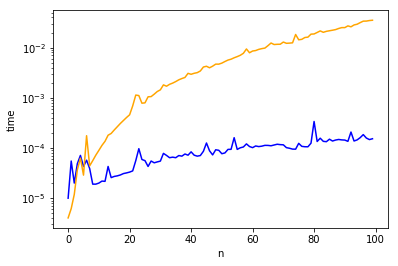

In [211]:
#TC: O(n), SC: O(n)

def MaxSumSubArrCirc(A):

    def MaxSumSubArrIt(A):
        curr_max = -inf
        max_ending_at_i = 0
        for i in range(len(A)):
            max_ending_at_i = max(max_ending_at_i + A[i], A[i])
            curr_max = max(curr_max, max_ending_at_i)

        return curr_max

    def MaxSumSubArrCircular(A):
    
        B = [0]*len(A)
        cum_sum = 0; i = len(A)-1; max_so_far = -inf

        while i > 0:
            cum_sum += A[i]
            max_so_far = max(max_so_far, cum_sum)
            B[i] = max_so_far
            i -= 1

        i, j = 1, 0
        cum_sum, curr_max_circ = 0, -inf
        while j < len(A)-1:
            cum_sum += A[j]
            curr_max_circ = max(curr_max_circ, cum_sum + B[i])
            i += 1; j += 1
            
        return curr_max_circ
    
    
    
    return max(MaxSumSubArrIt(A), MaxSumSubArrCircular(A))


A = [904, 40, 523, 12, -335, -385, -124, 481, -31]
print(MaxSumSubArrCirc(A))

#### test more cases against the BF case
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

timeBF = []
time_opt = []
for s in range(100):
    A = list(np.random.randint(-1000, high=1000, size=s))
    
    t1 = time.time()
    v = MaxSumSubArrCirc(A) 
    t2 = time.time()
    time_opt.append(t2-t1)
    
    t1 = time.time()
    vBF = MaxSubarrCircBF(A)
    t2 = time.time()
    timeBF.append(t2-t1)
    
    if v != vBF:
        print('Not Equal!')

plt.semilogy(range(100), time_opt, color = 'blue')
plt.plot(range(100), timeBF, color = 'orange')
plt.xlabel('n')
plt.ylabel('time');


#### 24.32 variant

This is the classic egg dropping problem with $N$ floors (plus a ground floor) and $E$ eggs.  Let the ground floor be called floor 0 (where we know the egg definitely does not break), and let the floors be labelled $0, 1, 2, \ldots, N$.  To goal is to find the minimum number of drops (in the worst case) to determine the critical floor at which an egg breaks.  Let $e$ be the current number of eggs that we have, and $n$ be the current number of floors still under consideration.  The problem is completely recursive in that if we choose a floor $1\le k \le n$ and drop an egg, the egg can either break, in which case we are left with the same exact problem, but with 1 less egg to use and $k - 1$ floors, or the egg does not break in which case we are left with the same exact problem, but with $n-k$ floors.  We cannot control if the egg breaks or does not break (that depends on the critical height of the egg which we do not know), so, since this is a worst case scenario, we consider the max of these 2.  We do, however, have control over which intermediate floor $k$, which to drop from, so I take a minimum over all values of $k$: 

\begin{equation}
  MinDrops(e, n)=\begin{cases}
    \infty & \text{for $e=0$, $n \ge 1$}\\
    0 & \text{for $e \ge 0$, $n = 0$}\\
    min_{1 \le k \le n} \left \{ \max \left \{ MinDrops(e, n-k)+1, MinDrops(e-1, k-1)+1 \right \} \right \}& \text{otherwise}.
  \end{cases}
\end{equation}

I implement this algo below with a time complexity is $O(EN^2)$ and the space complexity is $O(EN)$.  Implemented iteratively, I only need to memoize the current row as well as the previous row and thus the space complexity can be reduced to $O(N)$.

In [217]:
def MinDrops(e, n, memo):
    if (e, n) in memo:
        return memo[(e,n)]
    
    if e == 0 and n >= 1:
        return inf
    
    if e >= 0 and n == 0:
        return 0
    
    curr_min = inf
    for k in range(1, n+1):
        curr_min = min(curr_min, max(MinDrops(e, n-k, memo), MinDrops(e-1, k-1, memo))+1)
        
    memo[(e, n)] = curr_min
    
    return curr_min
        
    
print(MinDrops(2, 10, {}))
print(MinDrops(2, 36, {}))
print(MinDrops(2, 100, {}))
print(MinDrops(15, 100, {}))


4
8
14
7


In [241]:
### implement iteratively and return entire memo array so I can plot results

def MinDropsIt(E, N):
    
    memo = [[0]*(N+1) for _ in range(E+1)]
    
    for j in range(1, N+1):
        memo[0][j] = inf
        
    for e in range(1, E+1):
        for n in range(1, N+1):
            curr_min = inf
            for k in range(1, n+1):
                curr_min = min(curr_min, max(memo[e][n-k], memo[e-1][k-1])+1)
            memo[e][n] = curr_min
            
    return (memo[E][N], memo)

print(MinDropsIt(2, 10)[0])
print(MinDropsIt(2, 36)[0])
print(MinDropsIt(2, 100)[0])
print(MinDropsIt(15, 100)[0])

4
8
14
7


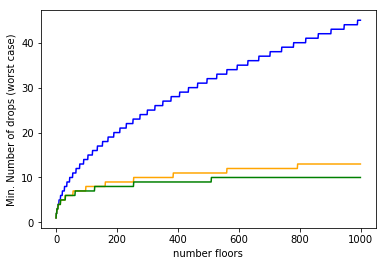

In [245]:
### plot results

memo = MinDropsIt(8, 1000)[1]

plt.plot(range(1000), memo[2][1:], color='blue')
plt.plot(range(1000), memo[4][1:], color='orange')
plt.plot(range(1000), memo[8][1:], color='green')
plt.xlabel('number floors')
plt.ylabel('Min. Number of drops (worst case)');


#### 24.33

The brute force way to search this matrix for the sub-matrix of all 1s is to enumerate all sub-matrices, then check each sub-matrix to make sure all values are equal to 1.  Two pairs of points define the submatrix, the upper left hand corner $(i_1, j_1)$ and lower right hand corner $(i_2, j_2)$, where $0 \le i_1 \le m-1$, $0 \le j_1 \le n-1$, $i_1 \le i_2 \le m-1$ and $j_1 \le j_2 \le n-1$, so there are $O(m^2n^2)$ sub-matrices.  It also takes $O(mn)$ to check each submatrix so that the brute force method takes $O(m^3n^3)$ time.  The brute force way to search this matrix for the sub-squares will have a similarly bad time complexity

I first deal with the subsquare problem.  Let $MaxSubSq(i, j)$ be the size of the maximum size subsquare matrix of all 1s whose lower right hand corner starts at $(i, j)$ in the given matrix.  If $M[i, j] = 0$, it is clear the $MaxSubSq(i, j) = 0$.  However, if If $M[i, j] = 1$, then the maximum size subsquare matrix of all 1s starting at $(i,j)$ is the minimum of the 3 neighbors, $MaxSubSq(i-1, j)$, $MaxSubSq(i, j-1)$, $MaxSubSq(i-1, j-1)$ plus one.  The base cases must be handled appropriately as well.  The get the largest subsquare matrix of all ones, I can then iterate through the memo table and return the max.

In a top down manner, the time and space complexity of this algorithm are both $O(nm)$.  Implementing this in a bottom up manner can reduce the space complexity to $O(n)$.  The proper recurrance is:

\begin{equation}
  MaxSubSq(i, j)=\begin{cases}
    0 & \text{for $M[i,j]=0$}\\
    0 & \text{for $i$ or $j=0$ and $M[i,j]=0$}\\
    1 & \text{for $i$ or $j=0$ and $M[i,j]=1$}\\
    \min \{MaxSubSq(i-1, j), MaxSubSq(i, j-1), MaxSubSq(i-1, j-1) \}+1 & \text{otherwise}
  \end{cases}
\end{equation}

In [248]:
import pandas as pd
from math import inf

def MaxSquare(M):

    def MaxSquareRec(i,j, memo):
        if (i,j) in memo:
            return memo[i,j]

        if M[i][j] == 0:
            memo[(i,j)] = 0
            return 0

        if i==0 or j==0:
            memo[(i,j)] = M[i][j]
            return memo[(i,j)]

        r1 = MaxSquareRec(i-1,j, memo) + 1
        r2 = MaxSquareRec(i,j-1, memo) + 1
        r3 = MaxSquareRec(i-1,j-1, memo) + 1

        res = min(r1, r2, r3)

        memo[(i,j)] = res 
        return res


    memo={}
    for i in range(len(M)):
        for j in range(len(M)):
            MaxSquareRec(i, j, memo)
    curr_max = -inf
    for i in memo:
        curr_max = max(curr_max, memo[i])
    
    return curr_max

M = [[1, 0], [1, 0]]
print(pd.DataFrame(M))
print(MaxSquare(M))

M = [[1, 0, 0, 0], [0, 1, 1, 0], [1, 1, 1, 0], [1, 1, 1, 1]]
print(pd.DataFrame(M))
print(MaxSquare(M))

M = [[1, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]
print(pd.DataFrame(M))
print(MaxSquare(M))

   0  1
0  1  0
1  1  0
1
   0  1  2  3
0  1  0  0  0
1  0  1  1  0
2  1  1  1  0
3  1  1  1  1
2
   0  1  2  3
0  1  0  0  0
1  0  1  1  1
2  1  1  1  1
3  1  1  1  1
3


#### 24.36

Here are a few algos to tackle this problem:

1) Iterate through all $i<j$ pairs and sum the pairs.  TC: $O(n^2)$, SC: $O(1)$

2) Iterate through all $i = 0, 1, 2, \ldots n-1$.  For each $i$ compute $k - A[i] \equiv v$.  Do a binary search to try to find $|v|$ in the array.  If this value is found and it is of the right sign return $i$ and $|v|$'s index.  TC: $O(nlog)$, SC: $O(1)$.

3) Store all elements in a hash table (where the key is the value of the element and the value is the index) and iterate through all $i = 0, 1, 2, \ldots n-1$.  For each $i$ compute $k - A[i] \equiv v$ and see whether $v$ is in the hash table.  If so return $i$ and $v$'s index.  TC: $O(n)$, SC: $O(n)$.
